[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PyMPDATA-examples.git/main?urlpath=lab/tree/PyMPDATA_examples/Jarecka_et_al_2015/fig_6.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PyMPDATA-examples/blob/main/PyMPDATA_examples/Jarecka_et_al_2015/fig_6.ipynb)

based on Fig. 6 from Jarecka, Jaruga & Smolarkiewicz 2015 (J. Comp. Phys. 289) "A spreading drop of shallow water"    
https://doi.org/10.1016/j.jcp.2015.02.003

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install atmos-cloud-sim-uj-utils
    from atmos_cloud_sim_uj_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [2]:
import numpy as np
from matplotlib import pylab
from atmos_cloud_sim_uj_utils import show_plot
from PyMPDATA_examples.Jarecka_et_al_2015 import Settings, Simulation

In [3]:
settings = Settings()
simulation = Simulation(settings)
output = simulation.run()

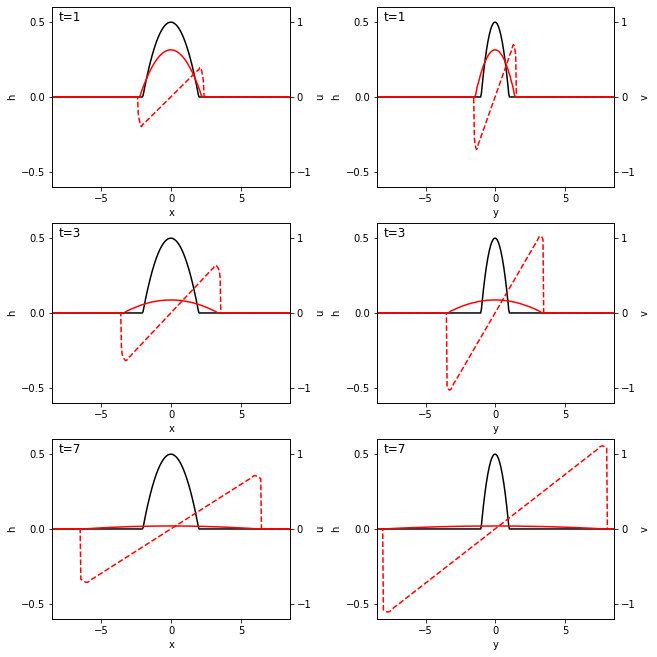

HTML(value="<a href='./fig_6.pdf' target='_blank'>./fig_6.pdf</a><br>")

In [4]:
cuts = ('x', 'y')
times = (1, 3, 7)

fig, axs = pylab.subplots(
    nrows=len(times), 
    ncols=len(cuts), 
    figsize=(9,9), 
    constrained_layout=True
)
momenta = {'x': 'uh', 'y': 'vh'}
for i_cut, cut in enumerate(cuts):
    if cut == 'x':
        idx = (slice(None, None), slice(settings.nx//2, settings.nx//2+1))
        coord = settings.dx * (np.linspace(-settings.nx//2, settings.nx//2, settings.nx)+.5)
    else:
        idx = (slice(settings.ny//2, settings.ny//2+1), slice(None, None))
        coord = settings.dy * (np.linspace(-settings.ny//2, settings.ny//2, settings.ny)+.5)
    for i_t, t in enumerate(times):
        axs[i_t, i_cut].set_xlim(-8.5, 8.5)
        axs[i_t, i_cut].set_xticks((-5, 0, 5))
        axs[i_t, i_cut].plot(coord, output[0]['h'][idx].squeeze(), color='black')
        axs[i_t, i_cut].plot(coord, output[t]['h'][idx].squeeze(), color='red')
        twin = axs[i_t, i_cut].twinx()
        q = output[t][momenta[cut]][idx].squeeze()
        h = output[t]['h'][idx].squeeze()
        twin.plot(
            coord, 
            np.where(h>settings.eps, np.divide(q, h, where=h>settings.eps), 0), 
            color='red', 
            linestyle='--'
        )
        twin.set_ylabel('u' if cut == 'x' else 'v')
        twin.set_ylim(-1.2, 1.2)
        twin.set_yticks((-1, 0, 1))
        axs[i_t, i_cut].set_xlabel(cut)
        axs[i_t, i_cut].set_ylim(-.6, .6)
        axs[i_t, i_cut].set_yticks((-.5, 0, .5))
        axs[i_t, i_cut].set_ylabel('h')
        axs[i_t, i_cut].set_title(f"t={t}", y=1.0, pad=-14, x=0.075)
show_plot("fig_6.pdf")